In [1]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os

In [3]:
pip list


Package                   Version
------------------------- ------------
anyio                     4.1.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.13.1
beautifulsoup4            4.12.2
bleach                    6.1.0
certifi                   2023.11.17
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.0
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.0
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema            2.19.0
filelock                  3.13.1
fonttools                 4.46.0
fqdn                      1.5.1
fsspec                    2023.12.1
idna                      3.6
ipykernel                 6.27.1
ipython      

In [4]:
from torchvision import transforms

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [5]:

data_dir = 'dataset'


image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}

In [6]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_datasets['train'].classes
class_names

{'train': 8, 'val': 2}


['dandruff', 'no_dandruff']

In [7]:
model = models.resnet18(pretrained=True)


for name, param in model.named_parameters():
    if "fc" in name: 
        param.requires_grad = True
    else:
        param.requires_grad = False


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) 



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
num_epochs = 10
for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("Training complete!")


train Loss: 9.3192 Acc: 0.0000
val Loss: 12.4859 Acc: 0.0000
train Loss: 8.0424 Acc: 0.0000
val Loss: 11.2872 Acc: 0.0000
train Loss: 6.4629 Acc: 0.0000
val Loss: 8.9470 Acc: 0.0000
train Loss: 4.7851 Acc: 0.0000
val Loss: 6.4659 Acc: 0.0000
train Loss: 2.2413 Acc: 0.7500
val Loss: 3.1843 Acc: 0.0000
train Loss: 1.9282 Acc: 0.3750
val Loss: 0.9810 Acc: 0.5000
train Loss: 1.0982 Acc: 0.7500
val Loss: 0.4701 Acc: 0.5000
train Loss: 0.6598 Acc: 0.5000
val Loss: 0.2994 Acc: 1.0000
train Loss: 0.5643 Acc: 0.6250
val Loss: 0.2231 Acc: 1.0000
train Loss: 0.4585 Acc: 0.8750
val Loss: 0.2022 Acc: 1.0000
Training complete!


In [9]:
torch.save(model.state_dict(), 'flower_classification_model.pth')

from PIL import Image
from torchvision import transforms

image_path = 'test4.png'
image = Image.open(image_path).convert('RGB')  # Convert to RGB to remove alpha channel

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)


In [30]:
from PIL import Image
from torchvision import transforms

image_path = 'test4.png'
image = Image.open(image_path).convert('RGB')  # Convert to RGB to remove alpha channel

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)


In [31]:
with torch.no_grad():
    output = model(input_batch)

_, predicted_class = output.max(1)


class_names = ['dandruff', 'no_dandruff'] 
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')

The predicted class is: no_dandruff


In [32]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


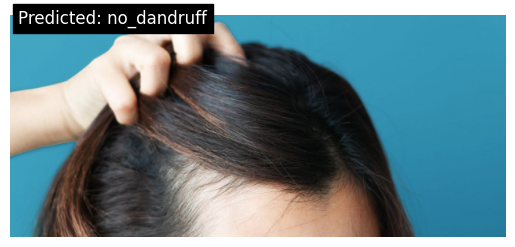

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='black')
plt.show()